In [1]:
# @author Nikhil Maserang
# @date 2023/04/12

import numpy as np
import scipy as sp
import scipy.ndimage as spnd
import matplotlib.pyplot as plt
import utils as ut
import cv2

plt.rcParams["figure.figsize"] = (10, 10)

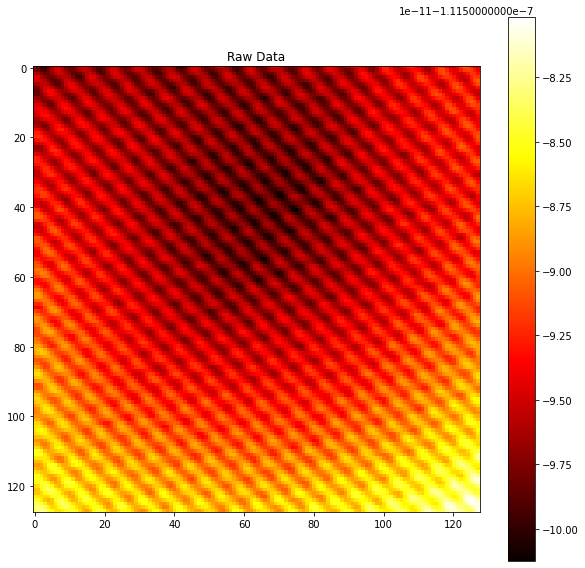

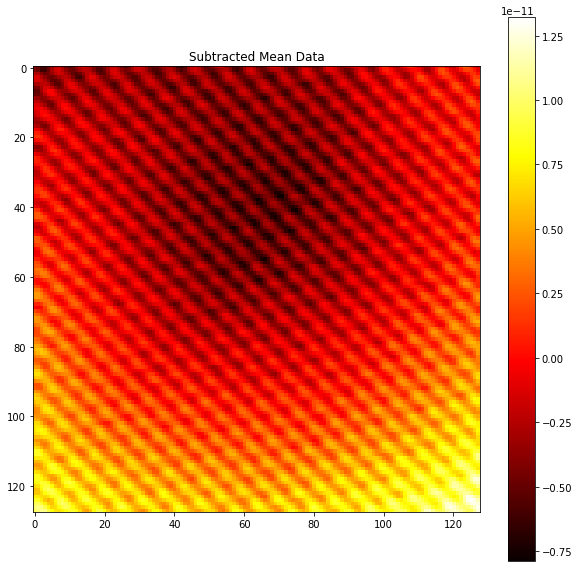

In [2]:
# get sxm data from file and plot it
fname = "testing.sxm"
data = ut.get_image_data(fname)
ut.heatmap(data, "Raw Data")

# remove the mean so the scalar FFT component doesn't mess up our results
data = ut.subtract_mean(data)
ut.heatmap(data, "Subtracted Mean Data")

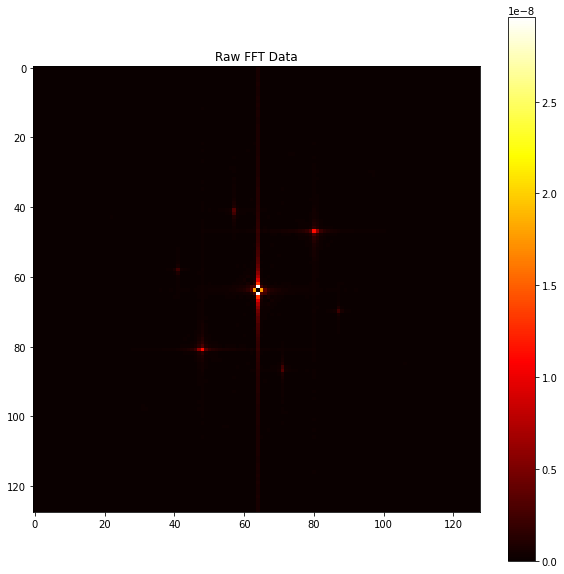

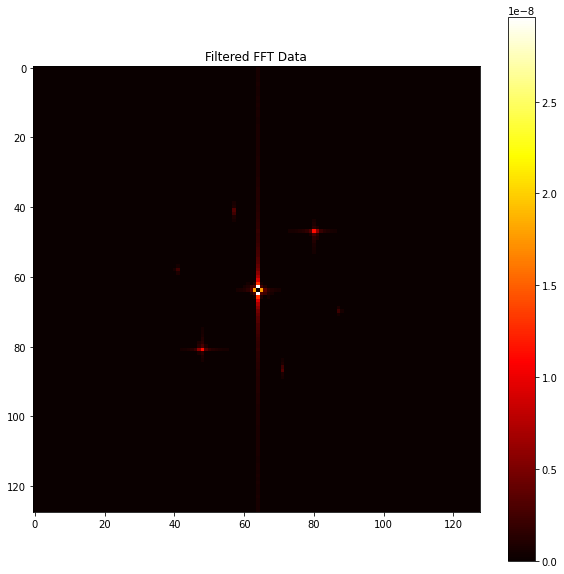

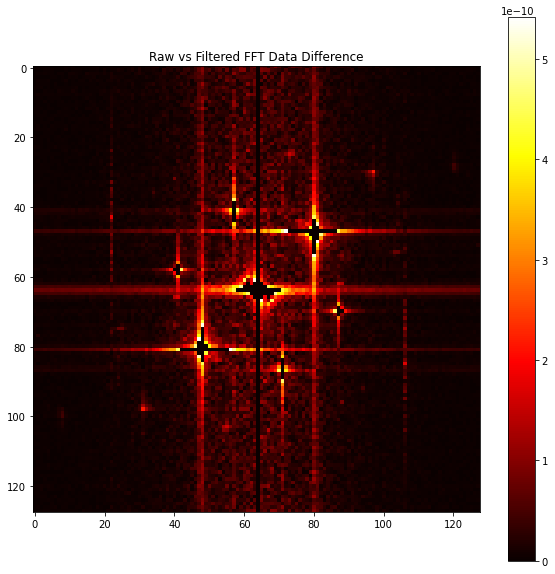

In [3]:
# perform shifted FFT on the data
rawfftdata = ut.run_shifted_fft(data)
fftdata = abs(rawfftdata)

# filter out any data points under the average + stddev
avgval = np.average(fftdata)
stddev = np.std(fftdata)
threshold = avgval + stddev

filteredfft = (fftdata >= threshold) * fftdata

# plot
ut.heatmap(fftdata, "Raw FFT Data")
ut.heatmap(filteredfft, "Filtered FFT Data")
ut.heatmap(abs(fftdata) - filteredfft, "Raw vs Filtered FFT Data Difference")


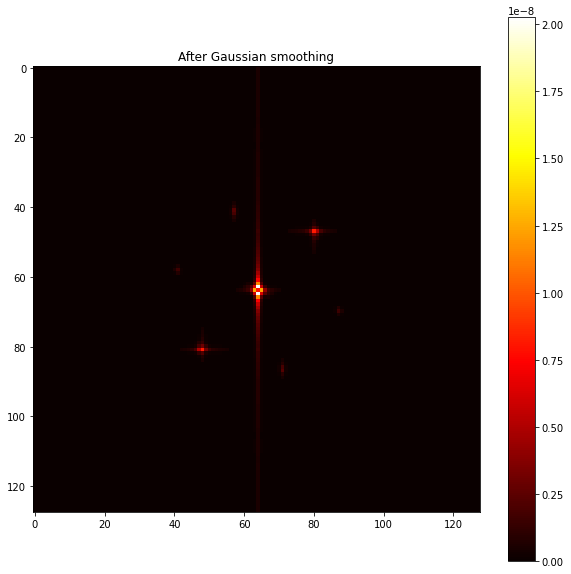

In [4]:
# perform Gaussian smoothing
smoothedfft = spnd.gaussian_filter(filteredfft, 0.5)
ut.heatmap(smoothedfft, "After Gaussian smoothing")

# THIS BREAKS EVERYTHING - WHY?

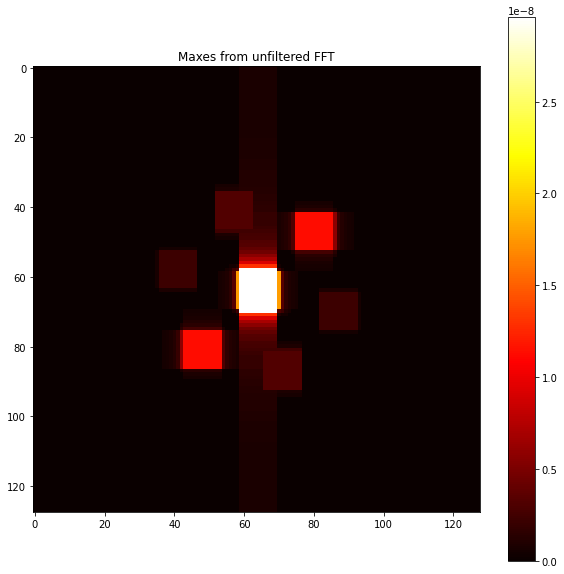

In [11]:
# find maximums of smoothed fft data, then plot
maxes = spnd.maximum_filter(filteredfft, 11)
ut.heatmap(maxes, "Maxes from unfiltered FFT")

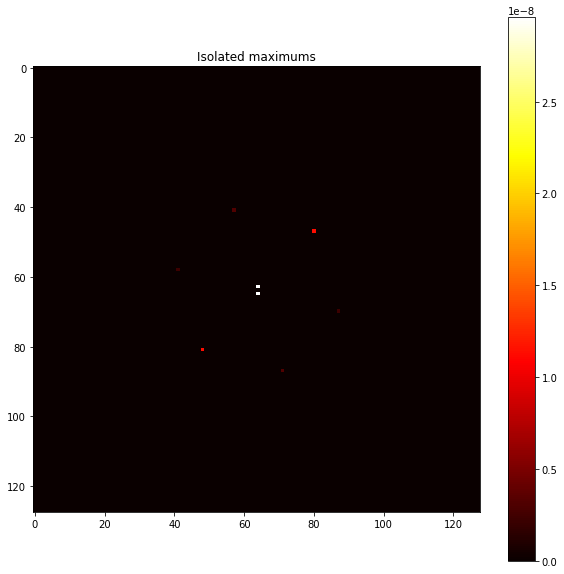

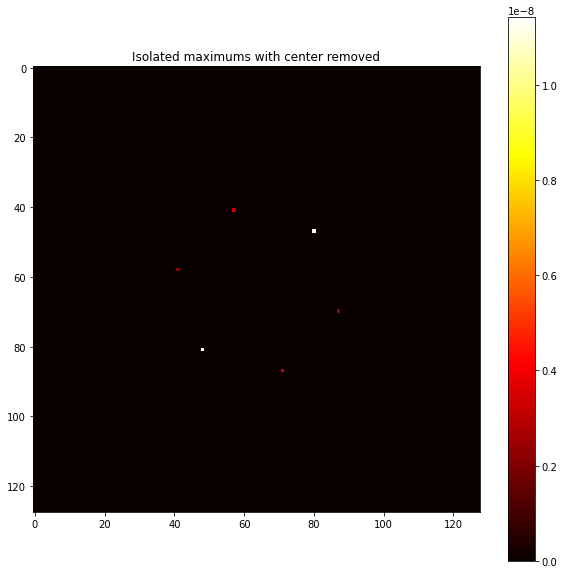

In [12]:
# find points where local max has same value as point itself
isolated_maxes = (maxes == filteredfft) * filteredfft
ut.heatmap(isolated_maxes, "Isolated maximums")

# blot out the middle to remove the extraneous points near 0
ut.blot_center(isolated_maxes, 5)
ut.heatmap(isolated_maxes, "Isolated maximums with center removed")

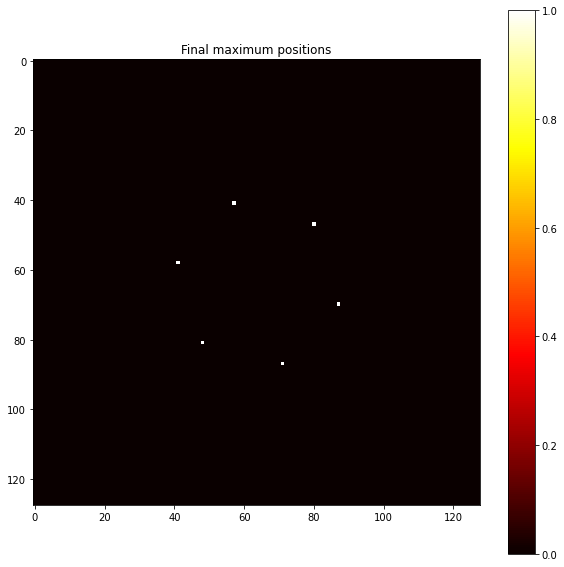

In [13]:
# get bitmap of nonzero matrix entries
maxes_bitmap = isolated_maxes != 0
ut.heatmap(maxes_bitmap, "Final maximum positions")

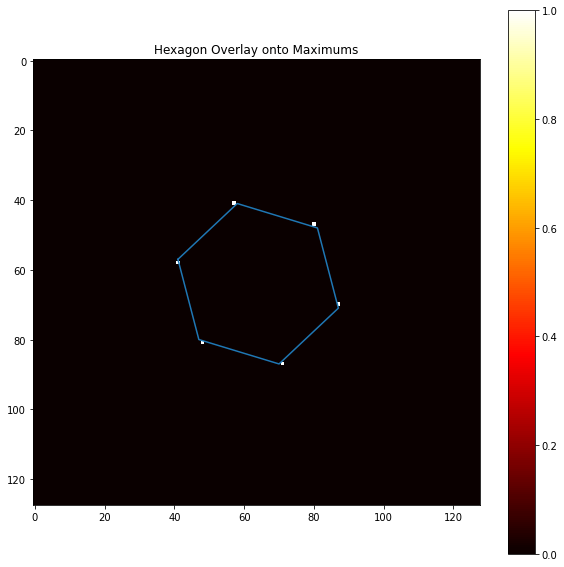

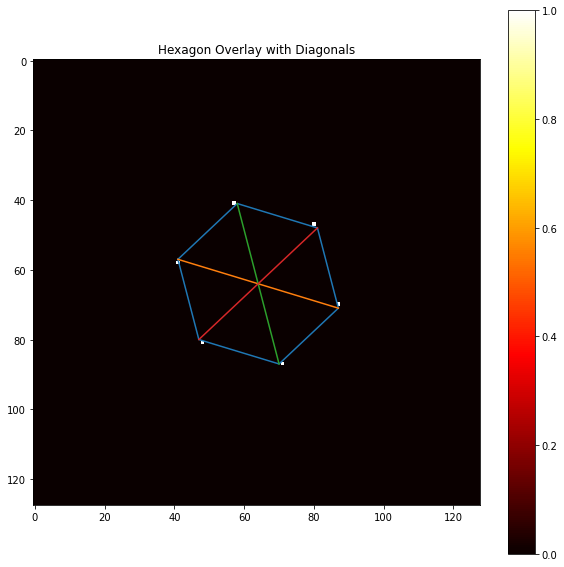

In [14]:
# get hexagon vertices and reorder
vertices = ut.bitmap_to_positions(maxes_bitmap)
ut.order_vertex_positions(vertices)

# make ordered list of x and y components of vertices, then append the first point again to make a closed loop
vertices_x, vertices_y = [x for x, y in vertices] + [vertices[0][0]], [y for x, y in vertices] + [vertices[0][1]]

# plot hexagon onto image
plt.plot(vertices_x, vertices_y)
ut.heatmap(maxes_bitmap, "Hexagon Overlay onto Maximums")

# plot hexagon with diagonals
diagonals = ut.get_hexagon_diagonals(vertices)
plottable_diagonals = map(lambda l: list(zip(l[0], l[1])), diagonals)
plt.plot(vertices_x, vertices_y)
for diagonal in plottable_diagonals: plt.plot(*diagonal)
ut.heatmap(maxes_bitmap, "Hexagon Overlay with Diagonals")

In [15]:
# figure out how image needs to be transformed
lengths = ut.get_diagonals_length(diagonals)
print(lengths)

[48.08326112068523, 47.53945729601885, 46.69047011971501]
